<a href="https://colab.research.google.com/github/kaleemahmed2022/DL_Project/blob/main/MidtermProject3_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project 3 (100 points total)

## In this project, you need to use neural networks: Build a Feed-forward Neural Network and a Convolutional Neural Network using Keras library to classify patients with heart conditions.

### Import the necessary libraries. (5 points)

In [38]:
#Import the necessary libraries.

!pip install tensorflow


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

### After that, upload the data and preprocess it. (20 points)

In [40]:
#Upload the data and save it to a Dataframe.
data = pd.read_csv('Heartbeat_dataset.csv', header=None)
data=pd.DataFrame(data)

In [41]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
len(data)

87554

In [43]:
#Plot the heartbeat of one patient.


In [44]:
# Check the class distribution. (Hint: Use .value_counts attribute and 
# remember that the labels are at the last column of the dataframe)
data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

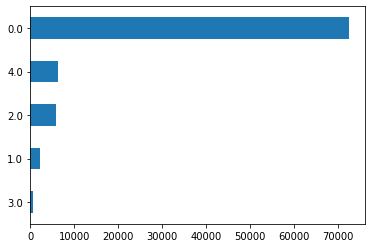

In [45]:
# Bar plot
data[187].value_counts().sort_values().plot(kind = 'barh')

In [46]:
# You should see that class 0 has more than 5 times as many instances as all other classes combined.
# Make the dataset more balanced by sampling the instances with class 0.
# Filter all the data that don't have class 0 to a new dataframe.
data_NOTclass0 = data[data[187] != 0].reset_index(drop=True)

In [47]:
# From all the data that has class 0 (again use filtering), sample 8000 instances and save it to a new dataframe. 
#(Hint: Use .sample attribute)
data_class0 = data[data[187] == 0].sample(n=8000).reset_index(drop=True)

In [48]:
# Concatenate the two new dataframes.
data_final = pd.concat([data_class0, data_NOTclass0]).reset_index(drop=True)
data_final.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.528610,0.367847,0.209809,0.128065,0.079019,0.051771,0.051771,0.040872,0.051771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.956608,0.731755,0.538462,0.293886,0.124260,0.003945,0.000000,0.003945,0.041420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.927419,0.780242,0.548387,0.308468,0.104839,0.040323,0.060484,0.084677,0.098790,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.987097,0.982258,0.435484,0.014516,0.246774,0.324194,0.314516,0.337097,0.343548,0.337097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.630170,0.051095,0.043796,0.046229,0.070560,0.060827,0.063260,0.068127,0.072993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Check the new class distribution.
data_final[187].value_counts()

0.0    8000
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: 187, dtype: int64

In [50]:
# Finally, separate the features and the labels into X and y variables.
X = data_final.iloc[:,:187]
y = data_final.iloc[:,187]

### Split the data into training and test sets. Use a 90-10 split ratio.

In [51]:
#Create the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

#Convert the sets into NumPy arrays (Necessary for Keras models)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [52]:
# Transform the target values
y_train_target = to_categorical(y_train)
y_test_target = to_categorical(y_test)

### Create a feed-forward neural network with 5 layers. (One input, three hidden, one output) (20 points)

In [53]:
# Create the network using the Keras layers. (Use 512, 100 and 20 nodes for the hidden layers.)
model = Sequential()
#first hidden layer
model.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))

#second hidden layer
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

#Third hidden layer
model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))

#Output layer (Multi-class classification)
model.add(Dense(5, activation='softmax', kernel_initializer='glorot_uniform'))

In [54]:
#Use val data to early stop
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [55]:
# Compile and train the network. (Do not forget to expand the training labels into multiple columns.)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
#Train the network
history = model.fit(X_train, y_train_target, validation_split=0.1, epochs=500, callbacks=[early_stop])

Epoch 1/500
585/585 [==============================] - 5s 7ms/step - loss: 0.5290 - accuracy: 0.8121 - val_loss: 0.3920 - val_accuracy: 0.8600
Epoch 2/500
585/585 [==============================] - 4s 8ms/step - loss: 0.3269 - accuracy: 0.8858 - val_loss: 0.3177 - val_accuracy: 0.8912
Epoch 3/500
585/585 [==============================] - 4s 7ms/step - loss: 0.2754 - accuracy: 0.9052 - val_loss: 0.2737 - val_accuracy: 0.9052
Epoch 4/500
585/585 [==============================] - 4s 7ms/step - loss: 0.2382 - accuracy: 0.9166 - val_loss: 0.2410 - val_accuracy: 0.9167
Epoch 5/500
585/585 [==============================] - 5s 8ms/step - loss: 0.2134 - accuracy: 0.9245 - val_loss: 0.2278 - val_accuracy: 0.9240
Epoch 6/500
585/585 [==============================] - 4s 7ms/step - loss: 0.1939 - accuracy: 0.9335 - val_loss: 0.2157 - val_accuracy: 0.9273
Epoch 7/500
585/585 [==============================] - 4s 7ms/step - loss: 0.1764 - accuracy: 0.9387 - val_loss: 0.2219 - val_accuracy: 0.9269

### Evaluate your neural network with the test data. You need to achieve 90+% test accuracy for full credit. (5 points)

In [57]:
# Get the predictions and convert the multicolumn array into class predictions.
#Evaluate the network
print(model.evaluate(X_test, y_test_target))
y_pred = np.argmax(model.predict(X_test), axis=1)

# Plot the confusion matrix and print the final accuracy.
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

73/73 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9467
[0.17963439226150513, 0.9467301964759827]
0.9467301862278042
[[777  35   8  11   8]
 [ 21 186   2   1   0]
 [ 14   1 544   9   2]
 [  1   0   1  51   0]
 [  3   2   2   2 628]]


### After the feed-forward neural network, train a convolutional neural network (CNN) on the same data. (20 points)

In [58]:
#Add a dimension to each sequence
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [59]:
X_train.shape

(20774, 187, 1)

In [60]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, BatchNormalization

model_cnn = Sequential()

model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu',input_shape=(187,1)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.5))

model_cnn.add(Flatten())

model_cnn.add(Dense(activation='relu', units=512))

model_cnn.add(Dense(activation='relu', units=100))

model_cnn.add(Dense(activation='relu', units=20))

model_cnn.add(Dense(activation='softmax', units=5))


In [62]:
# Compile and train the network.

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model_cnn.summary()

early = EarlyStopping(monitor='val_loss', patience=5)

model_cnn.fit(X_train, y_train_target, epochs=20, validation_split=0.1, callbacks=early)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 186, 32)           96        
                                                                 
 batch_normalization_21 (Bat  (None, 186, 32)          128       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 186, 32)           0         
                                                                 
 conv1d_22 (Conv1D)          (None, 185, 32)           2080      
                                                                 
 batch_normalization_22 (Bat  (None, 185, 32)          128       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 185, 32)          

### Evaluate your CNN with the test data. You need to beat the feed-forward network accuracy for full credit. (5 points)

In [63]:
# Get the predictions and convert the multicolumn array into class predictions.
#Evaluate the network
print(model_cnn.evaluate(X_test, y_test_target))
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

# Plot the confusion matrix and print the final accuracy.
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))



73/73 [==============================] - 1s 13ms/step - loss: 0.1982 - accuracy: 0.9472
[0.19822515547275543, 0.9471632838249207]
0.9471632741446514
[[784  44  10   5   4]
 [  9 175   0   1   0]
 [ 10   4 542  12   3]
 [  8   0   2  56   1]
 [  5   1   3   0 630]]


### Answer the following questions: (20 points, 5 each)

### 1) If we haven't undersampled class 0, we would get a even higher accuracy. (You can check yourself.) Why would this be misleading?

### 2) In the previous projects, you used 70-30 and 80-20 train-test splits. Why is a 90-10 split enough for this project?

### 3) Why did we need to add a dimension to the dataset before we fed it into a CNN?

### 4) Why does a CNN perform better than a feed-forward neural network for the data in this project?